# Matplotlib Recipes

## Table of contents
* [Set the z order when axes are shared](#axes-zorder)
* [Scatter plot from a pandas dataframe](#scatter-plot-pd)
* [Barplot from a pandas dataframe](#barplot-pd)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<a id=share-axes></a>

### How to share X or Y axes?

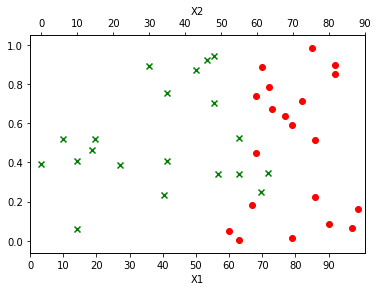

In [2]:
x1 = np.random.randint(60, 100, size=20)
x2 = np.random.randint(0, 70, size=20)
y1 = np.random.random(x1.shape)
y2 = np.random.random(x2.shape)

#share y axis
ax1 = plt.gca() # get the current axis
ax2 = ax1.twiny()

ax1.scatter(x1, y1, marker='o', color='r')
ax2.scatter(x2, y2, marker='x', color='g')

ax1.set_xlabel('X1')
ax2.set_xlabel('X2')
ax1.set_xticks(np.arange(0,100,10))
ax2.set_xticks(np.arange(0,100,10))
plt.show()

<a id=axes-zorder></a>

### Set the Z-order when axes are shared

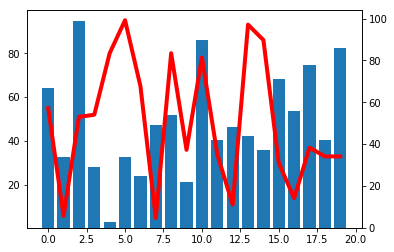

In [3]:
x1 = np.random.randint(0, 100, size=20)
x2 = np.random.randint(0, 100, size=20)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(x1, color='r', linewidth=4)
ax2.bar(np.arange(len(x2)), x2)
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_visible(False)
plt.show()

<a id=scatter-plot-pd></a>

### Scatter plot from a pandas dataframe

In [4]:
df = pd.DataFrame({"A" : np.random.randint(100, 200, size=500), "B" : np.random.randint(20, 50, size=500)})
df.head()

,A,B
0,118,24
1,187,33
2,144,25
3,145,20
4,168,24


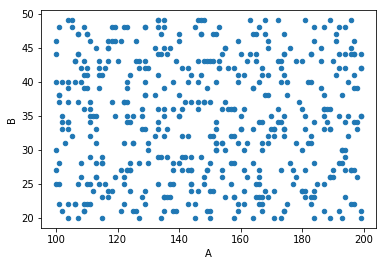

In [5]:
df.plot.scatter(x="A", y="B")
plt.show()

<a id=barplot-pd></a>

### Barplot from pandas dataframe.

In [6]:
df = pd.DataFrame({"Months": np.arange(1,13),
                   "A" : np.random.rand(12),
                   "B" : np.random.rand(12)}, columns=["A", "B"])
df.head()

,A,B
0,0.923948,0.235478
1,0.799564,0.610100
2,0.165388,0.819418
3,0.727234,0.324414
4,0.888387,0.260447


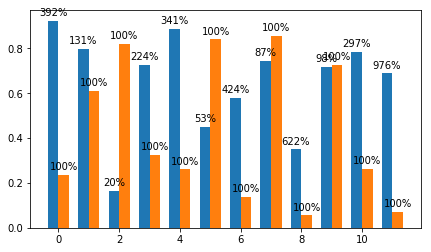

In [7]:

fig = plt.figure(figsize=(7, 4))
ax = plt.gca()
width = 0.35
rects1 = ax.bar(df.index-width/2, df.A, width)
rects2 = ax.bar(df.index+width/2, df.B, width)
for r1, r2 in zip(rects1, rects2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    percent = int(h1 * 100 / h2)
    ax.annotate('{}%'.format(percent),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('100%',
                    xy=(r2.get_x() + r2.get_width() / 2, h2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

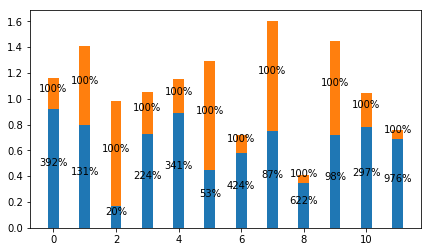

In [8]:

fig = plt.figure(figsize=(7,4))
ax = plt.gca()
width = 0.35
rects1 = ax.bar(df.index, df.A, width)
rects2 = ax.bar(df.index, df.B, width, bottom=df.A)
for r1, r2 in zip(rects1, rects2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    percent = int(h1 * 100 / h2)
    ax.annotate('{}%'.format(percent),
                    xy=(r1.get_x() + r1.get_width() / 2, h1/2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.annotate('100%',
                    xy=(r2.get_x() + r2.get_width() / 2, h1+h2/2),
                    xytext=(0, 0), 
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()